# Business understanding

Om een gevoel te krijgen voor de data resources die gegeven zijn, ga ik hier kijken tot welke kolommen ik toegang heb gekregen.<br>Door het zoeken van deze kolommen hoop ik erachter te komen wat voor data ik heb, en waarvoor deze data gebruikt gaat worden.

In [52]:
import pandas as pd
import numpy as np

In [2]:
vaste_kosten_excel = pd.ExcelFile("../dataset/IWVMAA VasteKosten V13.xlsx")
verkoop_data_excel = pd.ExcelFile("../dataset/IWVMAA VerkoopData V13.xlsx")

In [3]:
print(vaste_kosten_excel.sheet_names, verkoop_data_excel.sheet_names)

['VasteKosten'] ['Orders', 'Dealers', 'Verkopers', 'Autos']


In [3]:
orders_df = pd.read_excel('../dataset/IWVMAA VerkoopData V13.xlsx', sheet_name='Orders')
dealers_df = pd.read_excel('../dataset/IWVMAA VerkoopData V13.xlsx', sheet_name='Dealers')
verkopers_df = pd.read_excel('../dataset/IWVMAA VerkoopData V13.xlsx', sheet_name='Verkopers')
autos_df = pd.read_excel('../dataset/IWVMAA VerkoopData V13.xlsx', sheet_name='Autos')
vaste_kosten_df = pd.read_excel('../dataset/IWVMAA VasteKosten V13.xlsx')

In [37]:
print(orders_df.dtypes, "\n\n",
      dealers_df.dtypes,"\n\n",
      verkopers_df.dtypes,"\n\n",
      autos_df.dtypes,"\n\n",
      vaste_kosten_df.dtypes)

Ordernummer                        int64
Orderdatum                datetime64[ns]
Jaar                               int64
Land                              object
Aantal                             int64
DealerNummer                       int64
VerkoperNummer                     int64
AutoModel                         object
Bemiddelingsopbrengst              int64
VariabeleVerkoopkosten             int64
dtype: object 

 DealerNummer        int64
DealerNaam         object
DealerStad         object
DealerLand         object
DealerStartjaar     int64
dtype: object 

 VerkoperNummer               int64
VerkoperNaam                object
VerkoperVestiging           object
VerkoperManager             object
VerkoperInDienstJaar         int64
VerkoperBeloningsschaal    float64
dtype: object 

 AutoModel    object
AutoMerk     object
dtype: object 

 Jaar            int64
Land           object
VasteKosten     int64
dtype: object


**Informatie**<br>
Na het bepalen welke kolommen er zijn, en ik welk datatype ze staan, zou ik zeggen dat de dataframes ```orders``` ```dealers``` ```verkopers``` en ```autos``` gaan over de verkoopdata van een autohandelaar. Het dataframe ```vaste kosten``` zou kunnen gaan over de vaste kosten per verkochte auto of de kosten van het bedrijf. Om dit uit te zoeken worden de eerste 5 regels van dit dataframe hieronder weergegeven.

In [48]:
vaste_kosten_df.head()

,Jaar,Land,VasteKosten
0,2007,Nederland,2967000
1,2008,Nederland,3845000
2,2009,Nederland,4783000
3,2010,Nederland,4898000
4,2011,Nederland,4400000


Gekeken naar de data die hier staat, kan er worden vastgesteld dat dit de vaste kosten van het auto bedrijf per jaar zijn. 

# Data understanding

Om de data understanding uit te voeren, zullen de vragen als beschreven in de challenge worden beantwoord:
- Hoe ziet de data eruit? - 5 minuten
- Zijn er business termen die moeten worden uitgelegd? Zo ja, zal dit gebeuren met behulp van een definitiesheet - onbepaald
- Hoeveel auto's zijn er verkocht per jaar? - 8 minuten
- Hoeveel auto’s per model zijn er verkocht? - 1 minuut
- Wat was de omzet per land? - 2 minuten
- Wat was de bemiddelingsopbrengst per verkopermanager? - 4 minuten
- Wat was de dekkingsbijdrage per jaar? - 8 minuten

*Per vraag staat een getal in minuten, dit geeft aan hoe lang ik bezig ben geweest met het onderzoeken van het antwoord op de betreffende vraag. Omdat ik deze opdracht alleen uitvoer, zal de doorlooptijd en de totale tijd hetzelfde zijn.*

**Hoe ziet de data eruit?**<br>
Om een beeld te krijgen van de data, en nog eens goed naar de kolommen te kijken, is er besloten om een kort overzicht te geven van de tabellen, met elk 1 record erin. <br>De reden hiervoor is om te kijken of de data die ik verwacht in bepaalde tabellen overeenkomt met de realiteit

In [113]:
print("ORDERS:\n",orders_df.head(1), "\nDEALERS:\n",
      dealers_df.head(1),"\nVERKOPERS:\n",
      verkopers_df.head(1),"\nAUTOS\n",
      autos_df.head(1),"\nVASTE KOSTEN\n",
      vaste_kosten_df.head(1))

ORDERS:
    Ordernummer Orderdatum  Jaar       Land  Aantal  DealerNummer  \
0    200700001 2007-01-02  2007  Nederland       1           136   

   VerkoperNummer     AutoModel  Bemiddelingsopbrengst  VariabeleVerkoopkosten  
0              20  Toyota Yaris                    515                     248   
DEALERS:
    DealerNummer         DealerNaam DealerStad DealerLand  DealerStartjaar
0             1  Autohandel Zhang   Amsterdam  Nederland             2007 
VERKOPERS:
    VerkoperNummer VerkoperNaam VerkoperVestiging VerkoperManager  \
0               1       Rekers         Nederland          Bruins   

   VerkoperInDienstJaar  VerkoperBeloningsschaal  
0                  2007                     12.0   
AUTOS
         AutoModel AutoMerk
0  Alfa Romeo 147     Alfa 
VASTE KOSTEN
    Jaar       Land  VasteKosten
0  2007  Nederland      2967000


**Definitiesheet**<br>
In het onderstaande definitiesheet staan termen met een definitie ernaast. De manier waarop de definitie ontstaan is, is door googlen naar de definities van de woorden. Wanneer dit geen uitkomst biedt, zal het woord worden ontleed in delen, en zal er worden gegoogled op deze delen, om op die manier de betekenis van het gehele woord te achterhalen.

<table style="width:100%">
    <tr>
        <th>Term</th>
        <th>Definitie</th>
    </tr>
    <tr>
        <td>VerkoperBeloningsSchaal</td>
        <td>De schaal waarin een werknemer betaalt krijgt. Dit zal bijvoorbeeld hoger liggen wanneer een werknemer al beschikt over de juiste vaardigheden</td>
    </tr>
    <tr>
        <td>Bemiddelingsopbrengst</td>
        <td>Waarschijnlijk de opbrengst die wordt gemaakt om te bemiddelen tussen klant en dealer</td>
    </tr>
    <tr>
        <td>Variabele verkoopkosten</td>
        <td>De kosten die het kost om een product te verkopen, vaak afhangende van het totaalbedrag van de order</td>
    </tr>
    <tr>
        <td>Omzet</td>
        <td>Het totaalbedrag van verkopen (afzet * verkoopprijs)</td>
    </tr>
    <tr>
        <td>Dekkingsbijdrage</td>
        <td>De verkoopprijs min variabele kosten</td>
    </tr>
</table>

**Hoeveel auto's zijn er verkocht per jaar?**

In [62]:
orders_df

,Ordernummer,Orderdatum,Jaar,Land,Aantal,DealerNummer,VerkoperNummer,AutoModel,Bemiddelingsopbrengst,VariabeleVerkoopkosten
0,200700001,2007-01-02,2007,Nederland,1,136,20,Toyota Yaris,515,248
1,200700002,2007-01-02,2007,Nederland,1,63,21,Ford Galaxy,993,458
2,200700003,2007-01-02,2007,Nederland,1,79,22,Volkswagen New Beetle,1037,409
3,200700004,2007-01-02,2007,Nederland,1,528,12,Peugeot 206,470,225
4,200700005,2007-01-02,2007,Nederland,1,22,1,Toyota Avensis,857,474
...,...,...,...,...,...,...,...,...,...,...
214665,201640612,2016-12-30,2016,Nederland,1,1089,390,Volkswagen Golf,701,442
214666,201640613,2016-12-30,2016,Nederland,1,1714,265,Jeep Grand Cherokee,1004,622
214667,201640614,2016-12-30,2016,Nederland,1,2042,301,BMW X5,837,559
214668,201640615,2016-12-30,2016,Germany,1,3539,260,Chrysler Voyager,668,470


In [95]:
orders_df.groupby(orders_df["Jaar"])["Aantal"].sum()

Jaar
2007     6366
2008    10754
2009    15037
2010    17224
2011    17203
2012    19392
2013    25683
2014    27935
2015    34460
2016    40616
Name: Aantal, dtype: int64

**Hoeveel auto’s per model zijn er verkocht?**

In [98]:
orders_df.groupby(orders_df["AutoModel"])["Aantal"].sum()

AutoModel
Alfa Romeo 145/146     101
Alfa Romeo 147         751
Alfa Romeo 156         627
Alfa Romeo 159         350
Alfa Romeo 166          86
                      ... 
Volvo V40              322
Volvo V50             1333
Volvo V70             2113
Volvo XC60             101
Volvo XC90             336
Name: Aantal, Length: 299, dtype: int64

**Wat was de omzet per land?**

In [101]:
orders_df.groupby(orders_df["Land"])["Bemiddelingsopbrengst"].sum()

Land
België        7161935
Germany      28978376
Nederland    89887689
Name: Bemiddelingsopbrengst, dtype: int64

**Wat was de bemiddelingsopbrengst per verkopermanager?**

In [102]:
verkopers_df

,VerkoperNummer,VerkoperNaam,VerkoperVestiging,VerkoperManager,VerkoperInDienstJaar,VerkoperBeloningsschaal
0,1,Rekers,Nederland,Bruins,2007,12.0
1,2,Amjad,Nederland,Beumer,2007,11.0
2,3,Yildirim,Nederland,Bruins,2007,11.0
3,4,Blom,Nederland,Spit,2007,11.0
4,5,Voortman,Nederland,Bruins,2007,13.0
...,...,...,...,...,...,...
495,496,Essink,België,De Haene,2016,9.0
496,497,Kaam,Nederland,Bruins,2016,10.0
497,498,Merkel,Germany,NaN,2016,NaN
498,499,Rutte,Nederland,NaN,2016,NaN


In [117]:
merged_order_verkoper_dataframe = pd.merge(orders_df, verkopers_df, on="VerkoperNummer")
merged_order_verkoper_dataframe.groupby(merged_order_verkoper_dataframe["VerkoperManager"])["Bemiddelingsopbrengst"].sum().sort_values(ascending=False)

VerkoperManager
Ensink       23617819
Bruins       21860993
Beumer       15728348
Ter Brake    15717696
Spit         12962833
Postmann      9279086
Schloss       7483117
Krupf         4959443
Taggert       4062594
Schumann      3194136
De Haene      3157446
Mertens       2208409
De Leeuwe     1796080
Name: Bemiddelingsopbrengst, dtype: int64

**Wat was de dekkingsbijdrage per jaar?**

In [118]:
orders_df_dekkingsbijgrade=orders_df.copy()
orders_df_dekkingsbijgrade["Dekkingsbijdrage"] = orders_df_dekkingsbijgrade["Bemiddelingsopbrengst"] - orders_df_dekkingsbijgrade["VariabeleVerkoopkosten"]
orders_df_dekkingsbijgrade.groupby(orders_df["Jaar"])["Dekkingsbijdrage"].sum()

Jaar
2007    2090379
2008    3556385
2009    4970514
2010    5685075
2011    4698456
2012    5170553
2013    6776225
2014    6593262
2015    8257552
2016    9797420
Name: Dekkingsbijdrage, dtype: int64

# Item 1 - 20 minuten

**Jobstory**<br>
_"Als verkopermanager wil ik zien hoeveel mijn verkopers in 2016 verdienden"_

**Onderbouwing** <br>
Ik heb ervoor gekozen om het **verkoopjaar 2016** te kiezen, en zal de verkopers van verkopermanager **De Haene** laten zien in deze opdracht.<br>
Om de cijfers van de verkopers van De Haene te laten zien, zal ik gebruik maken van een **horizontale staafgrafiek**.<br>
De reden voor het gebruik van deze grafiek is omdat deze een **snel te overzien grafiek levert bestaande uit aantallen per categorie**.

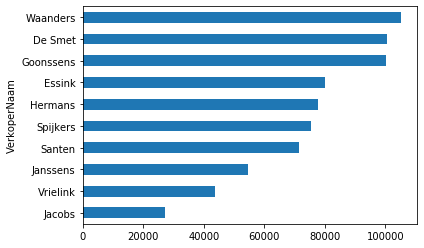

In [276]:
verkoper_per_bemiddelingsopbrengst_haene = merged_order_verkoper_dataframe.copy()
verkoper_per_bemiddelingsopbrengst_haene.where(verkoper_per_bemiddelingsopbrengst_haene["VerkoperManager"] == "De Haene", inplace=True)
verkoper_per_bemiddelingsopbrengst_haene.where(verkoper_per_bemiddelingsopbrengst_haene["Jaar"] == 2016 , inplace = True)
verkoper_per_bemiddelingsopbrengst_heane = verkoper_per_bemiddelingsopbrengst_haene.dropna()
verkoper_per_bemiddelingsopbrengst_heane.groupby(verkoper_per_bemiddelingsopbrengst_haene["VerkoperNaam"])["Bemiddelingsopbrengst"].sum().sort_values(ascending=True).plot.barh()


**Conclusie**<br>
In het jaar 2016 is te concluderen dat **Waanders** het best heeft gepresteerd onder de verkopermanager De Haene.<br>Aangezien verkopers een **verkoper beloningsschaal** hebben, zal er voor waanders zeker **verhoging** hierin kunnen plaatsvinden.<br>Het valt overigens op dat **Jacobs** niet goed presteerd in vergelijking met zijn collega's. Voor het bedrijf zou het wellicht gunstig zijn om een gesprek met hem te voeren over het presteren.

# Item 2 - 25 minuten

**Jobstory**<br>
_"Wat zijn de gemiddelde dekkingsbijdragen per automerk in 2014?"_

**Onderbouwing**<br>
Voor dit item heb ik ervoor gekozen om een overzicht te leveren van het gemiddelde van de dekkingsbijdrage van verschillende automerken. De reden hiervoor is omdat dit naar mijn mening de **meeste informatie biedt**.<br> Hiernaast heb ik gekozen om als visualisatie wederom een **horizontale staafgrafiek** te gebruiken.<br> De reden voor het gebruik van deze grafiek is omdat deze een **snel te overzien grafiek levert bestaande uit aantallen per categorie**.

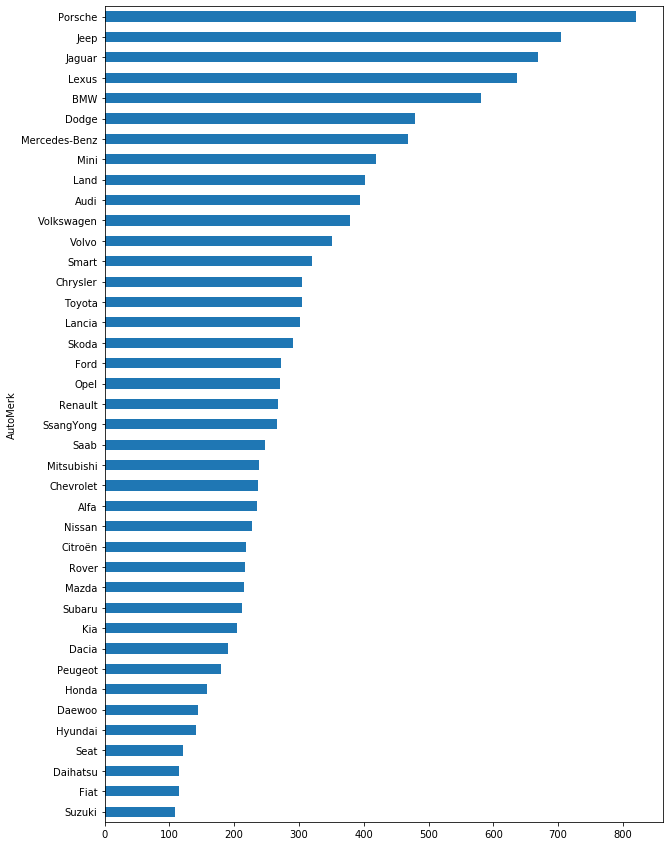

In [275]:
orders_dekkingsbijdrage_auto_info = pd.merge(orders_df_dekkingsbijgrade, autos_df, on="AutoModel")
x = orders_dekkingsbijdrage_auto_info.groupby("AutoMerk")["Dekkingsbijdrage"].mean().sort_values(ascending=True).plot(kind='barh', figsize=(10,15))

**Conclusie**

Persoonlijk ben ik niet een kenner van auto's, maar ik had na het zien van de bovenstaande grafiek het vermoeden dat de ```dekkingsbijdrage``` **hoger is bij de duurdere automerken**.</br>Hierop ben ik gaan navragen bij twee studentcollega's waarvan ik weet dat ze autofan zijn. Een van hen wist mijn hypothese te bevestigen, en kon mij vertellen dat **alle merken tot aan het merk "Smart" over het algemeen behoren tot de premium auto's**.<br>Om vanuit de business te verklaren waarom deze duurdere auto's een hogere dekkingsbijdrage hebben, zou ik gokken dat, aangezien de database van een autohandelaar is, **de handelaar een hogere prijs vraagt om het risico wat hij loopt wanneer een duurdere auto niet goed verkoopt te mitigeren.**

# Item 3 - 135 minuten
**Jobstory**<br>
_"Als autohandelaar wil ik weten wat de procentuele groei in het aantal verkochte auto's per jaar is"_

**Verantwoording**<br>
Ik denk dat dit de enige volledige jobstory voor dit item is waar ook veel informatie uit kan worden gehaald.<br>Voor het visualiseren van deze gegevens ga ik een **lijngrafiek** gebruiken. Dit omdat het daarmee makkelijk is om verschillen per jaar te visualiseren. 

[Text(0, 0.5, 'Percentuele toename'), Text(0.5, 0, 'Jaar')]

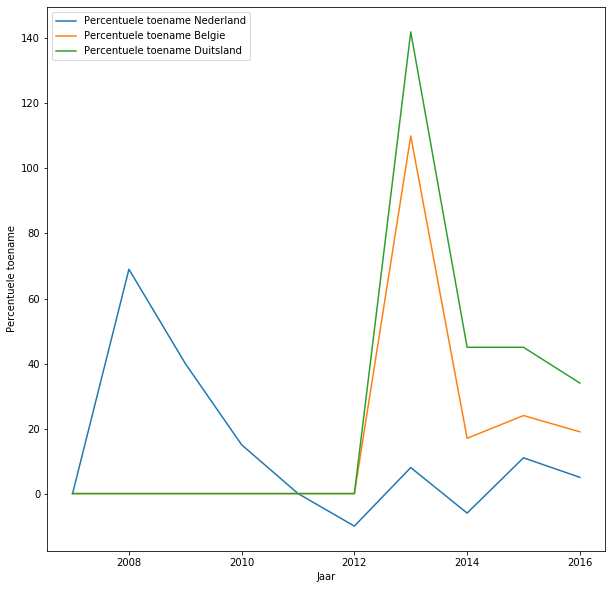

In [51]:
orders_df_nl = orders_df.copy()
orders_df_be = orders_df.copy()
orders_df_de = orders_df.copy()

orders_df_nl = orders_df_nl.where(orders_df_nl["Land"] == "Nederland").dropna()
orders_df_be = orders_df_be.where(orders_df_be["Land"] == "België").dropna()
orders_df_de = orders_df_de.where(orders_df_de["Land"] == "Germany").dropna()

jaar_verkoop_nl = dict(orders_df_nl.groupby("Jaar")["Aantal"].sum())
jaar_verkoop_be = dict(orders_df_be.groupby("Jaar")["Aantal"].sum())
jaar_verkoop_de = dict(orders_df_de.groupby("Jaar")["Aantal"].sum())

jaar_verkoop_list_nl = [*jaar_verkoop_nl.values()]
jaar_verkoop_list_be = [*jaar_verkoop_be.values()]
jaar_verkoop_list_de = [*jaar_verkoop_de.values()]

def getPercentueleToename(oud, nieuw):
    return (nieuw - oud) / oud * 100

percentuele_toename_nl_list= [0] #Het eerste jaar is er geen toename
percentuele_toename_be_list= [0,0,0,0,0,0]
percentuele_toename_de_list= [0,0,0,0,0,0]

for i in range(len(jaar_verkoop_list_nl) -1):
    percentuele_toename_nl_list.append(round(getPercentueleToename(jaar_verkoop_list_nl[i], jaar_verkoop_list_nl[i+1])))
    
for i in range(len(jaar_verkoop_list_be) -1):    
    percentuele_toename_be_list.append(round(getPercentueleToename(jaar_verkoop_list_be[i], jaar_verkoop_list_be[i+1])))

for i in range(len(jaar_verkoop_list_de) -1):
    percentuele_toename_de_list.append(round(getPercentueleToename(jaar_verkoop_list_de[i], jaar_verkoop_list_de[i+1])))

toename_per_jaar = pd.DataFrame({"Jaar" : [*jaar_verkoop_nl.keys()], "Percentuele toename Nederland":percentuele_toename_nl_list, "Percentuele toename Belgie":percentuele_toename_be_list, "Percentuele toename Duitsland":percentuele_toename_de_list})



plot_toename_per_jaar = toename_per_jaar.plot(x = "Jaar", figsize = (10,10))
plot_toename_per_jaar.set(xlabel="Jaar", ylabel="Percentuele toename")